# Data Preprocessing

In [26]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#importing dataset
df=pd.read_csv("Employee-Attrition.csv")

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
df.shape

(1470, 35)

In [13]:
#checking NULL Values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [14]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_4203/2400079689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

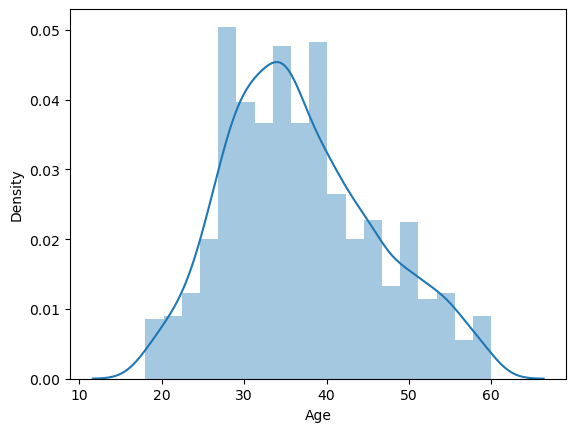

In [17]:
#Data Visualization.
sns.distplot(df["Age"])

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_4203/2164201515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

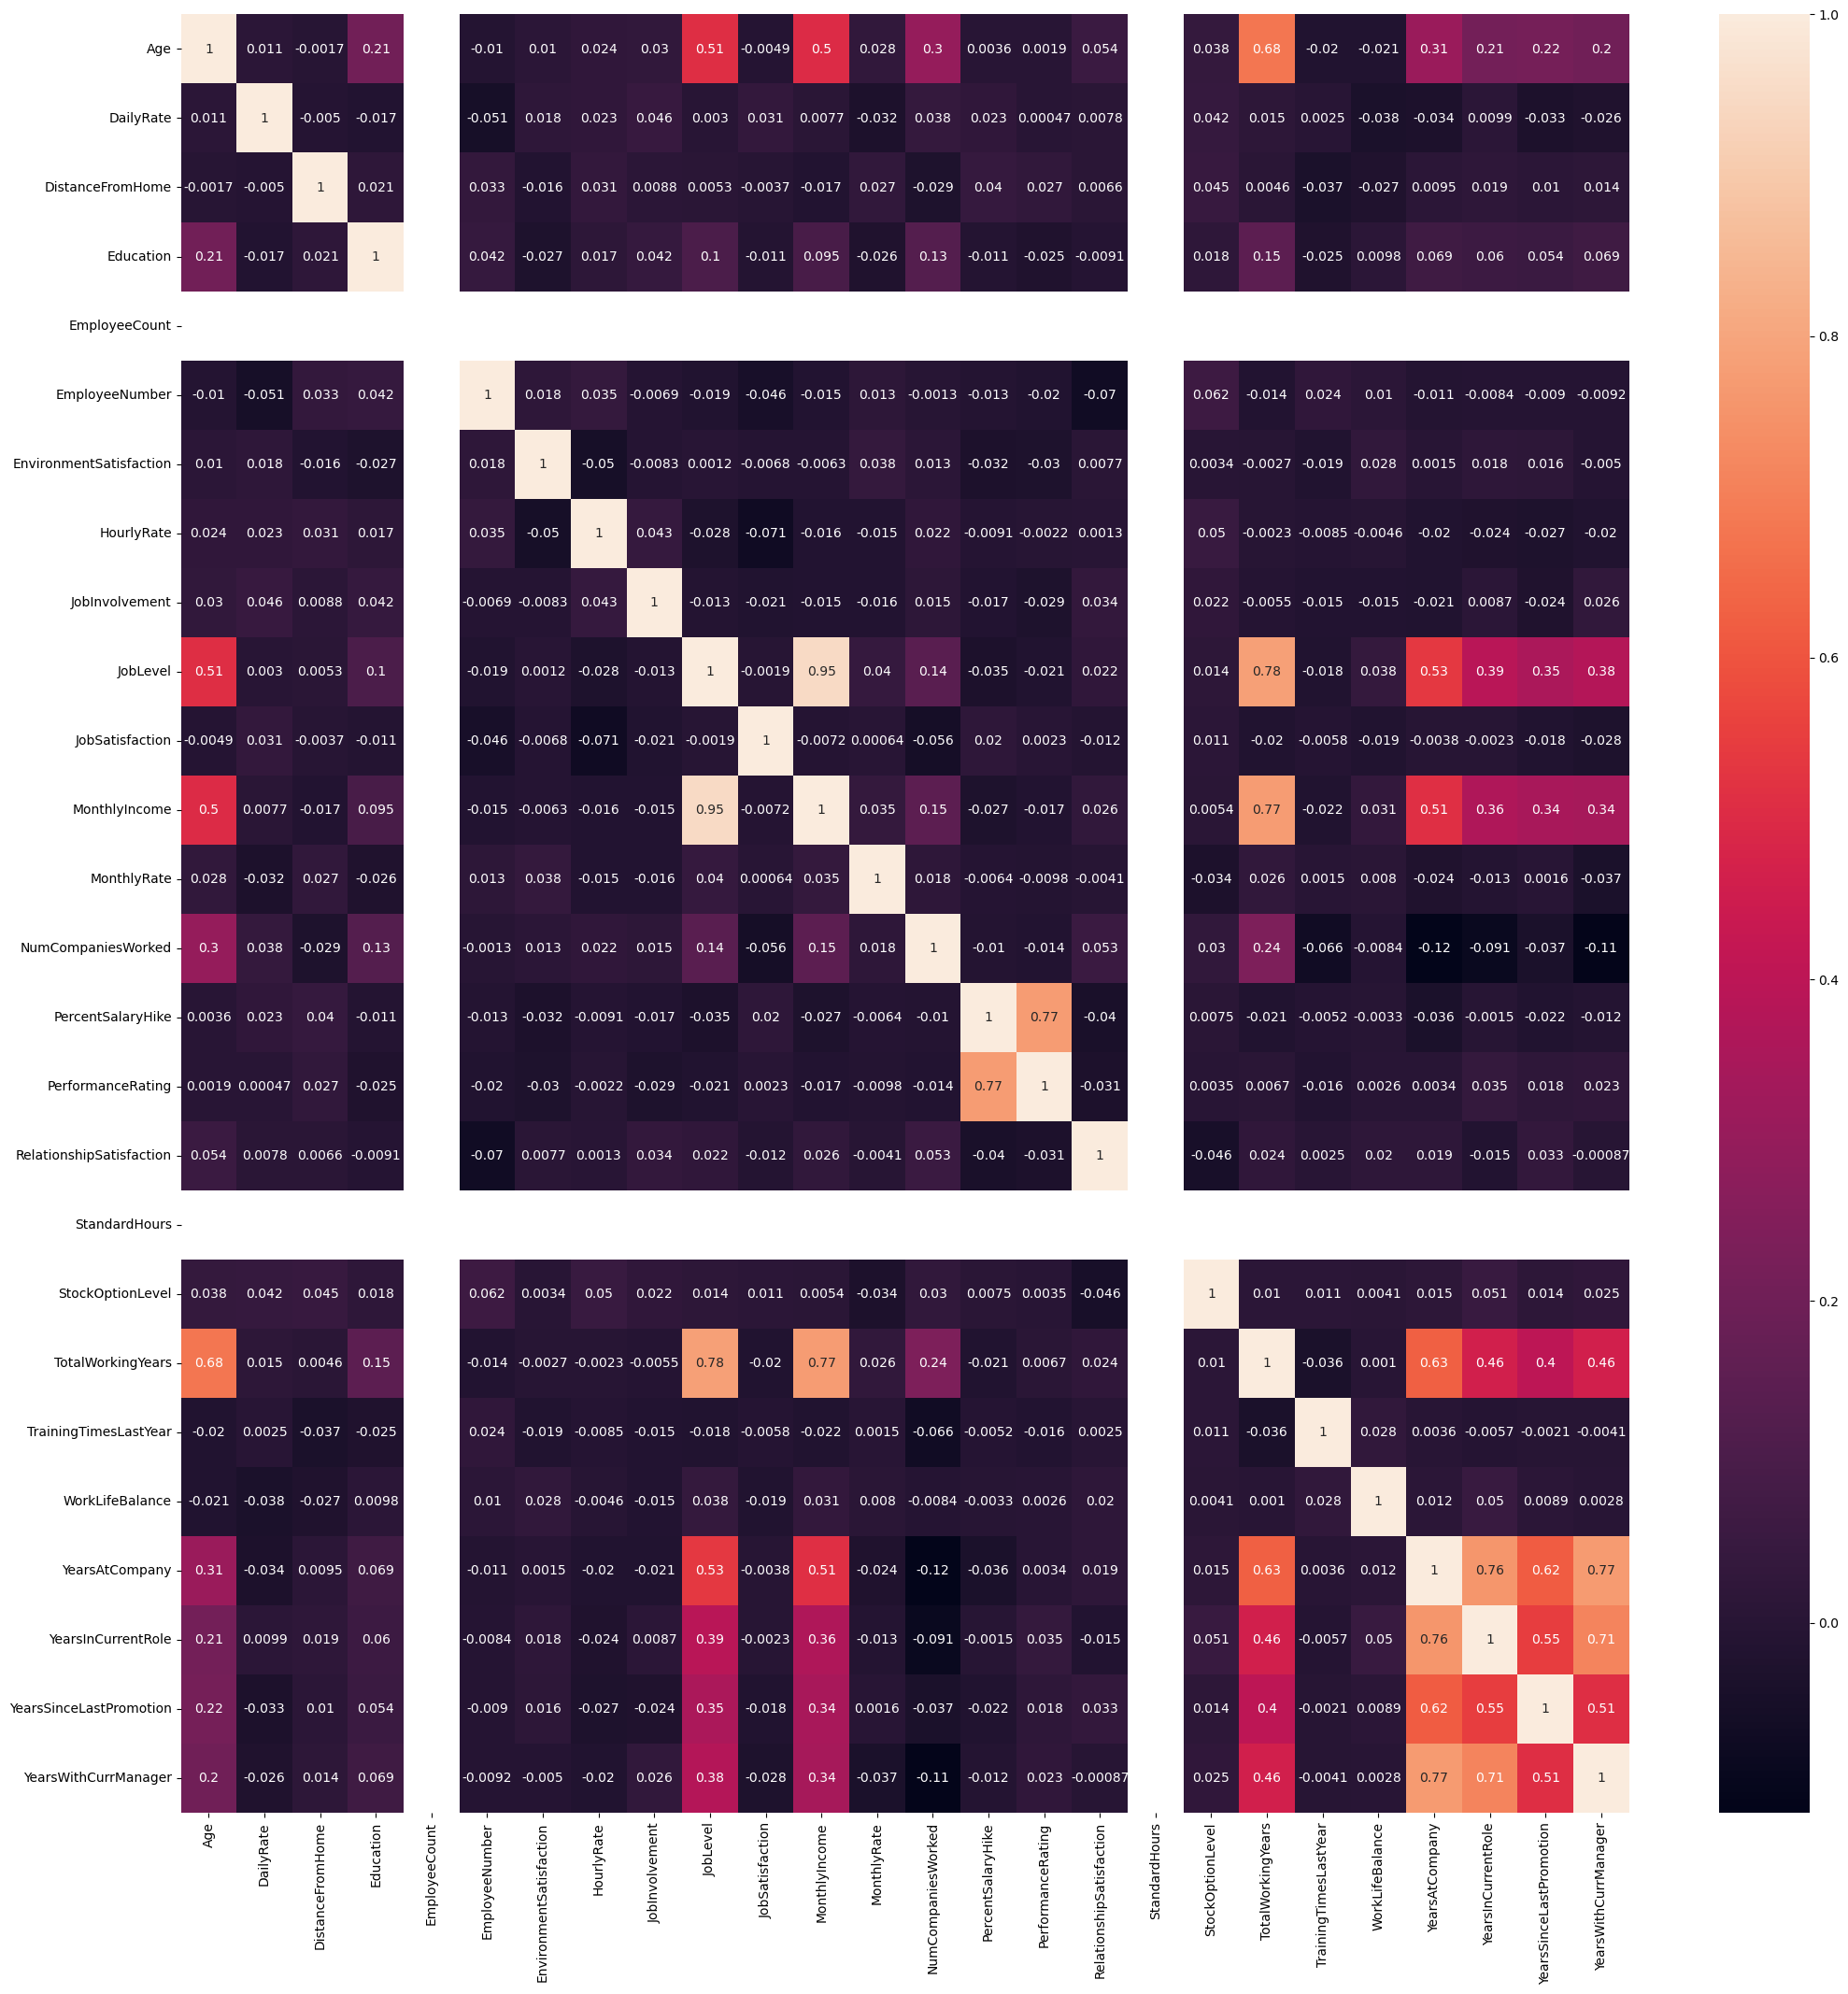

In [31]:
corr=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)

In [40]:
#removing one of two highly correlated columns
df.drop(['JobLevel', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany','YearsWithCurrManager'],axis=1,inplace=True)

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_4203/2164201515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

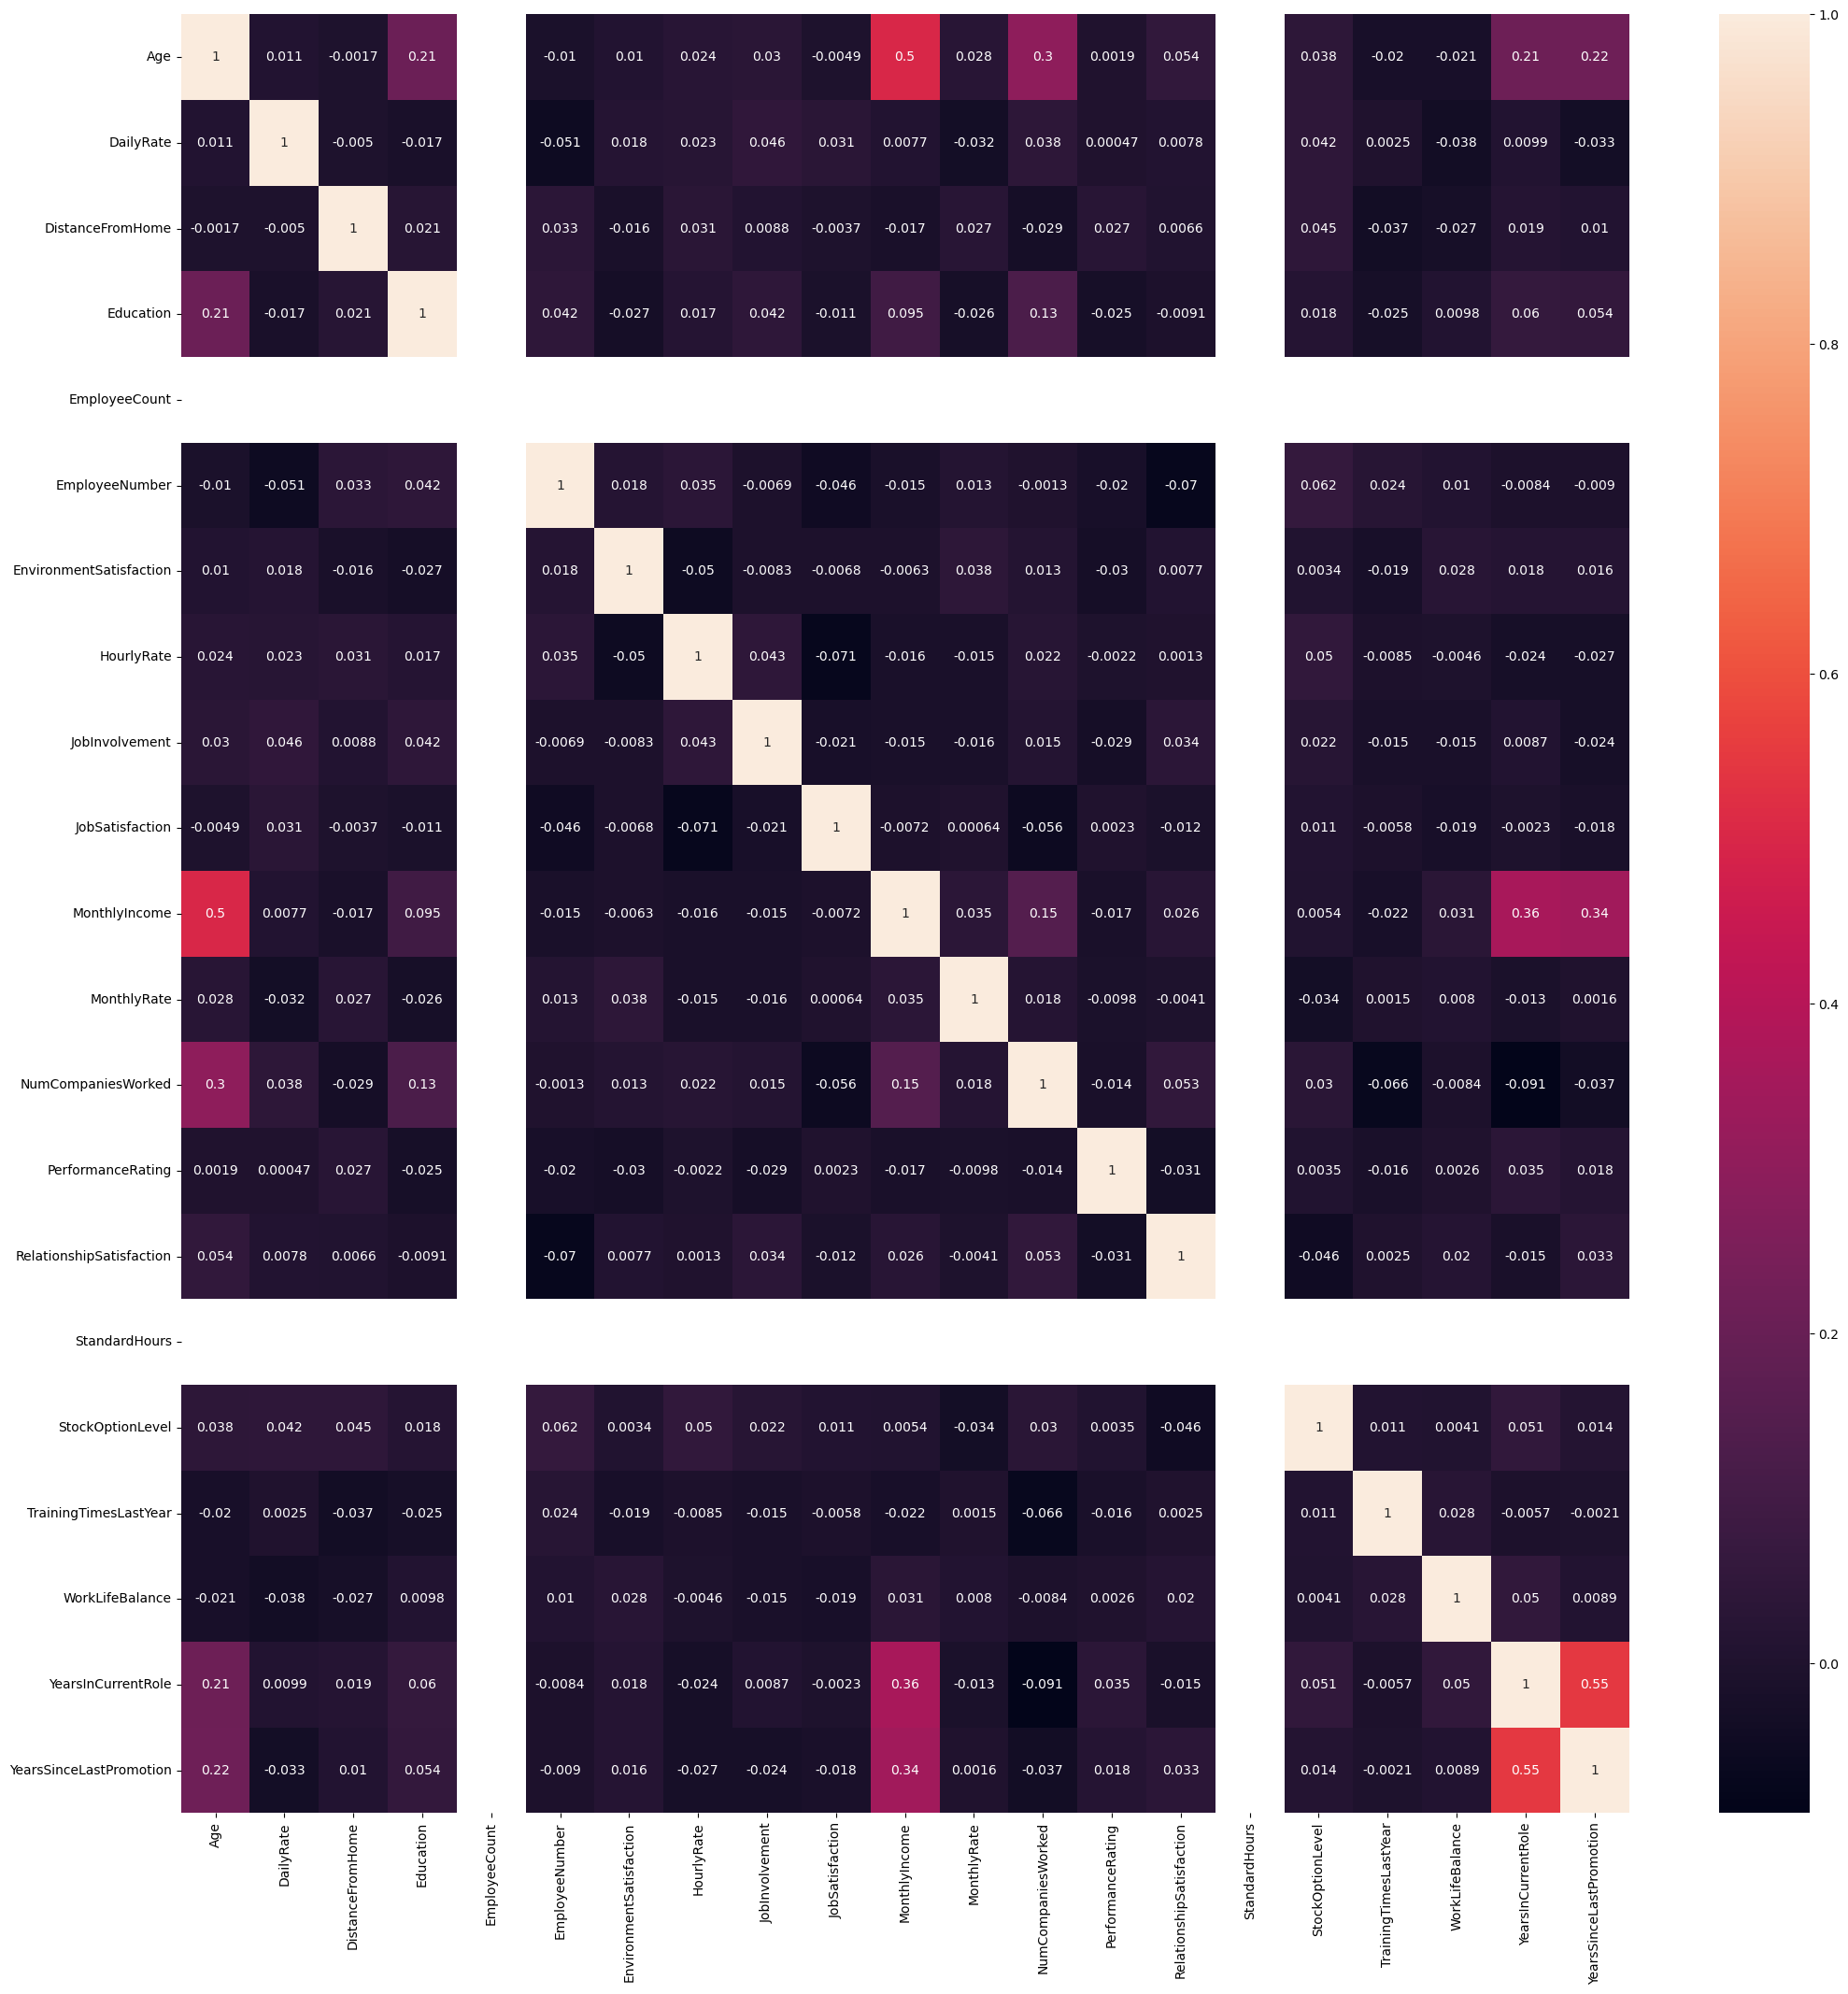

In [43]:
corr=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)

In [67]:
df["EmployeeCount"].nunique()

1

In [75]:
df["Over18"].nunique()

1

In [87]:
df["PerformanceRating"].unique()

array([3, 4])

In [89]:
df["StandardHours"].nunique()

1

In [94]:
df["WorkLifeBalance"].unique()

array([1, 3, 2, 4])

In [95]:
df["YearsInCurrentRole"].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17])

In [96]:
df["YearsSinceLastPromotion"].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

In [68]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [76]:
df.drop(['Over18'],axis=1,inplace=True)

In [98]:
df.drop(['StandardHours'],axis=1,inplace=True)

In [99]:
#outlier detection and removal
df.iloc[0:5,0:30]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,2,No,3,4,1,3,3,2,2


In [100]:
df.median()

/var/folders/75/l1625v4n7qnbfp296v2f82ch0000gn/T/ipykernel_4203/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StockOptionLevel                1.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
dtype: float64

<Axes: >

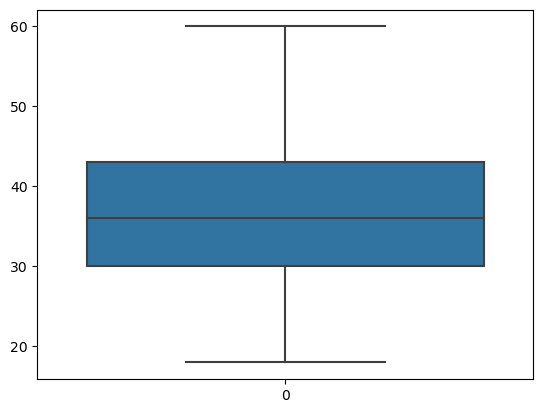

In [61]:
sns.boxplot(df.Age)

<Axes: >

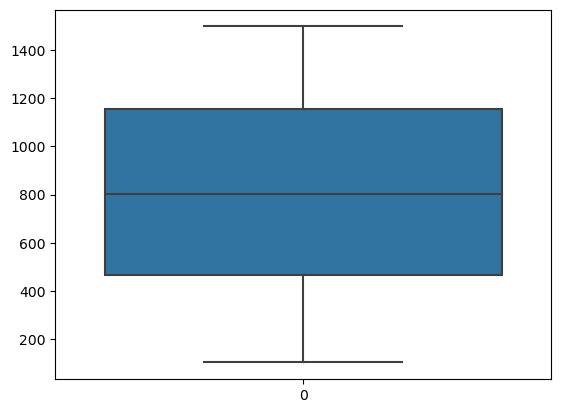

In [62]:
sns.boxplot(df.DailyRate)

<Axes: >

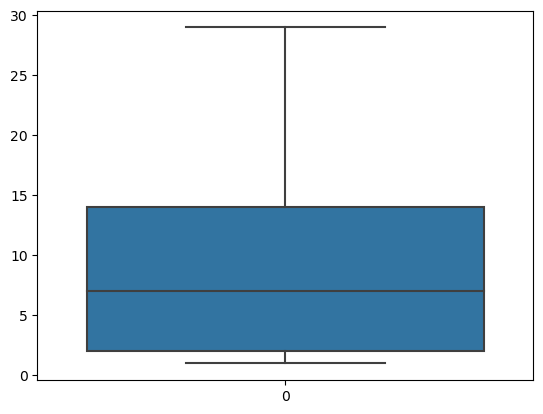

In [63]:
sns.boxplot(df.DistanceFromHome)

<Axes: >

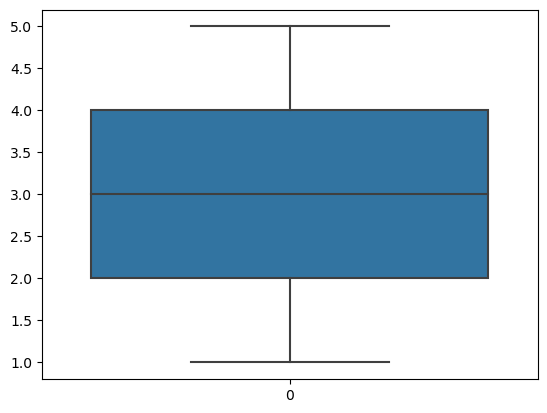

In [71]:
sns.boxplot(df.Education)

<Axes: >

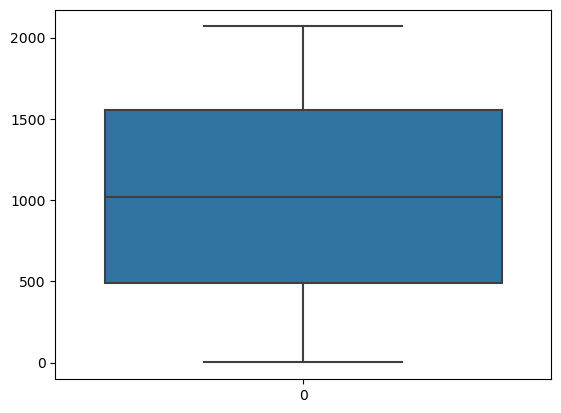

In [72]:
sns.boxplot(df.EmployeeNumber)

<Axes: >

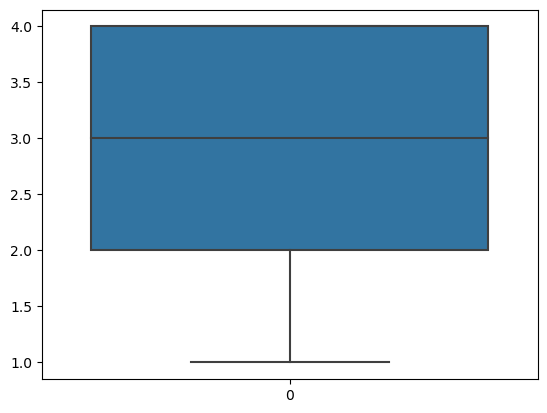

In [74]:
sns.boxplot(df.EnvironmentSatisfaction)

<Axes: >

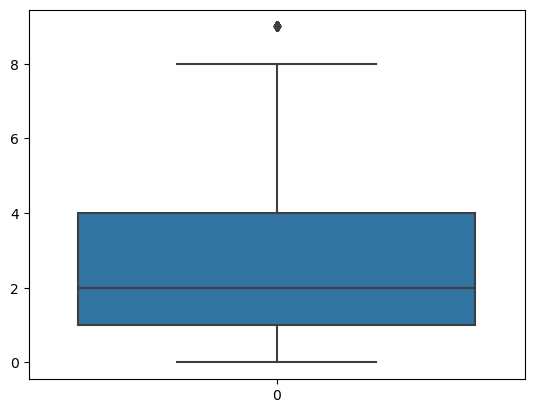

In [78]:
sns.boxplot(df.NumCompaniesWorked)

In [79]:
q1=df.NumCompaniesWorked.quantile(0.25)
q3=df.NumCompaniesWorked.quantile(0.75)
iqr=q3-q1

In [80]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [83]:
df['NumCompaniesWorked']=np.where(df['NumCompaniesWorked']>upper_limit,2,df['NumCompaniesWorked'])

<Axes: >

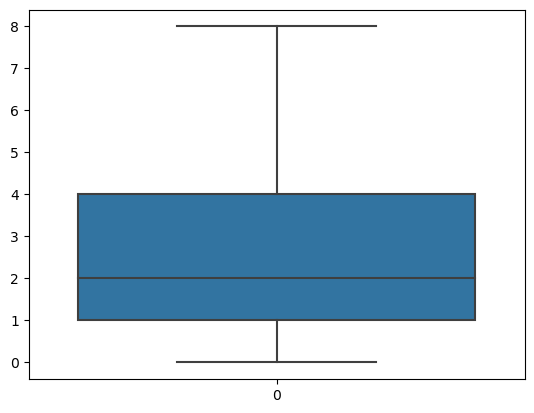

In [84]:
sns.boxplot(df.NumCompaniesWorked)

In [102]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,3,1,0,0,1,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,4,4,1,3,3,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,3,3,0,3,3,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,2,No,3,4,1,3,3,2,2


In [108]:
#splitting into dependent and independent variables
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

In [109]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,3,1,0,0,1,4,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,4,4,1,3,3,7,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,3,2,0,3,3,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,3,3,0,3,3,7,3
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,2,No,3,4,1,3,3,2,2


In [110]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [112]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.BusinessTravel=le.fit_transform(x.BusinessTravel)
x.Department=le.fit_transform(x.Department)
x.EducationField=le.fit_transform(x.EducationField)
x.Gender=le.fit_transform(x.Gender)
x.JobRole=le.fit_transform(x.JobRole)
x.MaritalStatus=le.fit_transform(x.MaritalStatus)
x.OverTime=le.fit_transform(x.OverTime)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,2,1102,2,1,2,1,1,2,0,94,3,7,4,2,5993,19479,8,1,3,1,0,0,1,4,0
1,49,1,279,1,8,1,1,2,3,1,61,2,6,2,1,5130,24907,1,0,4,4,1,3,3,7,1
2,37,2,1373,1,2,2,4,4,4,1,92,2,2,3,2,2090,2396,6,1,3,2,0,3,3,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,6,3,1,2909,23159,1,1,3,3,0,3,3,7,3
4,27,2,591,1,2,1,3,7,1,1,40,3,2,2,1,3468,16632,2,0,3,4,1,3,3,2,2


In [126]:
y=y.to_frame()

In [127]:
y.Attrition=le.fit_transform(y.Attrition)

In [128]:
y=y.squeeze()

In [131]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [132]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [133]:
x_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.000000,0.333333,0.0,0.914286,0.666667,0.875,1.000000,1.0,0.262454,0.698053,1.000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.000484,0.666667,1.0,0.442857,0.333333,0.750,0.333333,0.5,0.217009,0.916001,0.125,0.0,1.0,1.000000,0.333333,0.500000,0.666667,0.388889,0.066667
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.001451,1.000000,1.0,0.885714,0.333333,0.250,0.666667,1.0,0.056925,0.012126,0.750,1.0,0.0,0.333333,0.000000,0.500000,0.666667,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.001935,1.000000,0.0,0.371429,0.666667,0.750,0.666667,0.5,0.100053,0.845814,0.125,1.0,0.0,0.666667,0.000000,0.500000,0.666667,0.388889,0.200000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.002903,0.000000,1.0,0.142857,0.666667,0.250,0.333333,0.5,0.129489,0.583738,0.250,0.0,0.0,1.000000,0.333333,0.500000,0.666667,0.111111,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.785714,0.25,0.6,0.996613,0.666667,1.0,0.157143,1.000000,0.250,1.000000,0.5,0.082254,0.409396,0.500,0.0,0.0,0.666667,0.333333,0.500000,0.666667,0.111111,0.000000
1466,0.500000,1.0,0.365784,0.5,0.178571,0.00,0.6,0.997097,1.000000,1.0,0.171429,0.333333,0.000,0.000000,0.5,0.472986,0.777474,0.500,0.0,0.0,0.000000,0.333333,0.833333,0.666667,0.388889,0.066667
1467,0.214286,1.0,0.037938,0.5,0.107143,0.50,0.2,0.998065,0.333333,1.0,0.814286,1.000000,0.500,0.333333,0.5,0.270300,0.123670,0.125,1.0,1.0,0.333333,0.333333,0.000000,0.666667,0.111111,0.000000
1468,0.738095,0.5,0.659270,1.0,0.035714,0.50,0.6,0.998549,1.000000,1.0,0.471429,0.333333,0.875,0.333333,0.5,0.230700,0.447661,0.250,0.0,0.0,1.000000,0.000000,0.500000,0.333333,0.333333,0.000000


In [134]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [135]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 26), (294, 26), (1176,), (294,))

In [136]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
1374,0.952381,1.0,0.360057,1.0,0.714286,0.50,0.2,0.937107,1.000000,0.0,0.600000,0.666667,0.375,1.0,0.5,0.888152,0.388155,0.500,1.0,0.0,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000
1092,0.642857,1.0,0.607015,0.5,0.964286,0.50,1.0,0.747460,1.000000,1.0,0.957143,0.666667,0.750,1.0,0.5,0.059136,0.100020,0.500,0.0,1.0,1.000000,0.333333,0.500000,0.666667,0.222222,0.000000
768,0.523810,1.0,0.141732,1.0,0.892857,0.50,0.4,0.515239,0.666667,1.0,0.628571,0.666667,0.875,0.0,0.5,0.388994,0.807990,0.125,0.0,0.0,0.333333,0.333333,0.500000,0.333333,0.388889,0.466667
569,0.428571,0.0,0.953472,1.0,0.250000,0.75,0.2,0.381229,0.000000,1.0,0.657143,0.333333,0.875,0.0,1.0,0.346393,0.487252,0.125,0.0,0.0,0.333333,0.000000,0.166667,0.666667,0.388889,0.000000
911,0.166667,0.5,0.355762,1.0,0.821429,0.00,0.2,0.615385,0.666667,1.0,0.614286,0.000000,1.000,1.0,1.0,0.005740,0.238747,0.125,1.0,0.0,1.000000,0.000000,0.666667,0.666667,0.000000,0.066667


# Logistic Regression Model Building

In [158]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [159]:
model.fit(x_train,y_train)

LogisticRegression()

In [160]:
pred=model.predict(x_test)

In [161]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [162]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

# Evaluation of Logistic Regression Model

In [142]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [208]:
p=accuracy_score(y_test,pred)
accuracy_score(y_test,pred)

0.8843537414965986

In [144]:
confusion_matrix(y_test,pred)

array([[242,   3],
       [ 31,  18]])

In [145]:
pd.crosstab(y_test,pred)

col_0,0,1
Attrition,,
0,242,3
1,31,18


In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       245
           1       0.86      0.37      0.51        49

    accuracy                           0.88       294
   macro avg       0.87      0.68      0.72       294
weighted avg       0.88      0.88      0.86       294



In [147]:
probability=model.predict_proba(x_test)[:,1]

In [148]:
probability

array([0.18532596, 0.21074855, 0.36371946, 0.05046911, 0.63269845,
       0.05414756, 0.69495093, 0.08924896, 0.01405847, 0.18691855,
       0.08151551, 0.30709245, 0.02326356, 0.6927869 , 0.31550294,
       0.04531878, 0.13603538, 0.2545832 , 0.0564401 , 0.19915012,
       0.2566306 , 0.02323744, 0.05120053, 0.05625222, 0.61338058,
       0.41873684, 0.06416652, 0.03784882, 0.64125079, 0.04786785,
       0.01946755, 0.06509844, 0.07778437, 0.24587936, 0.08168993,
       0.07838116, 0.07499929, 0.07932737, 0.04376017, 0.05126789,
       0.10274525, 0.0230451 , 0.01914007, 0.02072721, 0.03150459,
       0.52971447, 0.19671177, 0.00522148, 0.76213205, 0.53709074,
       0.11684521, 0.43891975, 0.0909896 , 0.24821133, 0.66785067,
       0.32706794, 0.02323478, 0.31484279, 0.03320729, 0.14291994,
       0.02628869, 0.18323607, 0.16285239, 0.0359007 , 0.43104435,
       0.0264165 , 0.2119949 , 0.21613901, 0.11438524, 0.08878625,
       0.10179045, 0.28321471, 0.06740378, 0.08599529, 0.05413

In [149]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

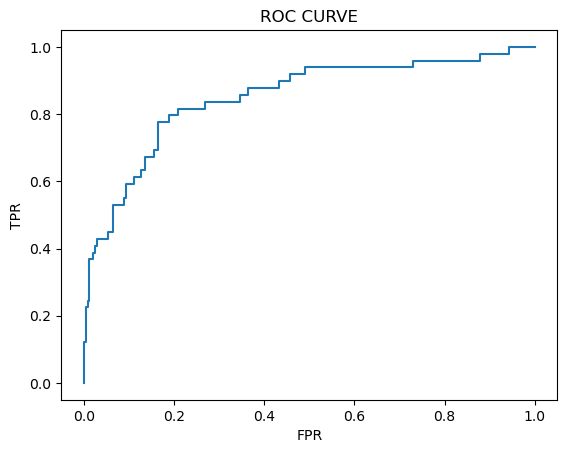

In [150]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# Decesion Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [178]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [179]:
pred2=dtc.predict(x_test)

In [172]:
pred2

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [168]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

# Evaluation

In [207]:
p2=accuracy_score(y_test,pred2)
accuracy_score(y_test,pred2)

0.7619047619047619

In [157]:
confusion_matrix(y_test,pred)

array([[210,  35],
       [ 29,  20]])

In [181]:
pd.crosstab(y_test,pred)

col_0,0,1
Attrition,,
0,242,3
1,31,18


In [182]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       245
           1       0.86      0.37      0.51        49

    accuracy                           0.88       294
   macro avg       0.87      0.68      0.72       294
weighted avg       0.88      0.88      0.86       294



In [183]:
probability2=dtc.predict_proba(x_test)[:,1]

In [184]:
probability2

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [185]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

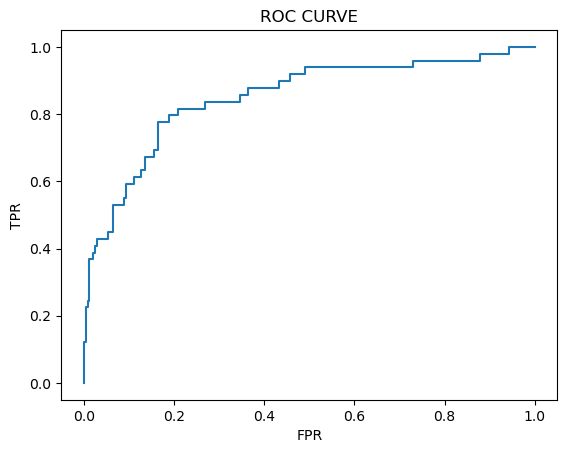

In [186]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.3889727184934814, 0.9705882352941176, 'x[15] <= 0.093\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.13275591501690004, 0.9117647058823529, 'x[18] <= 0.5\ngini = 0.431\nsamples = 271\nvalue = [186, 85]'),
 Text(0.07188556253017865, 0.8529411764705882, 'x[0] <= 0.083\ngini = 0.327\nsamples = 194\nvalue = [154, 40]'),
 Text(0.0386286817962337, 0.7941176470588235, 'x[2] <= 0.377\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.02317720907774022, 0.7352941176470589, 'x[15] <= 0.017\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.01545147271849348, 0.6764705882352942, 'x[5] <= 0.375\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.00772573635924674, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.02317720907774022, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03090294543698696, 0.6764705882352942, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.05408015451472718, 0.7352941176470589, 'x[2] <= 0.82

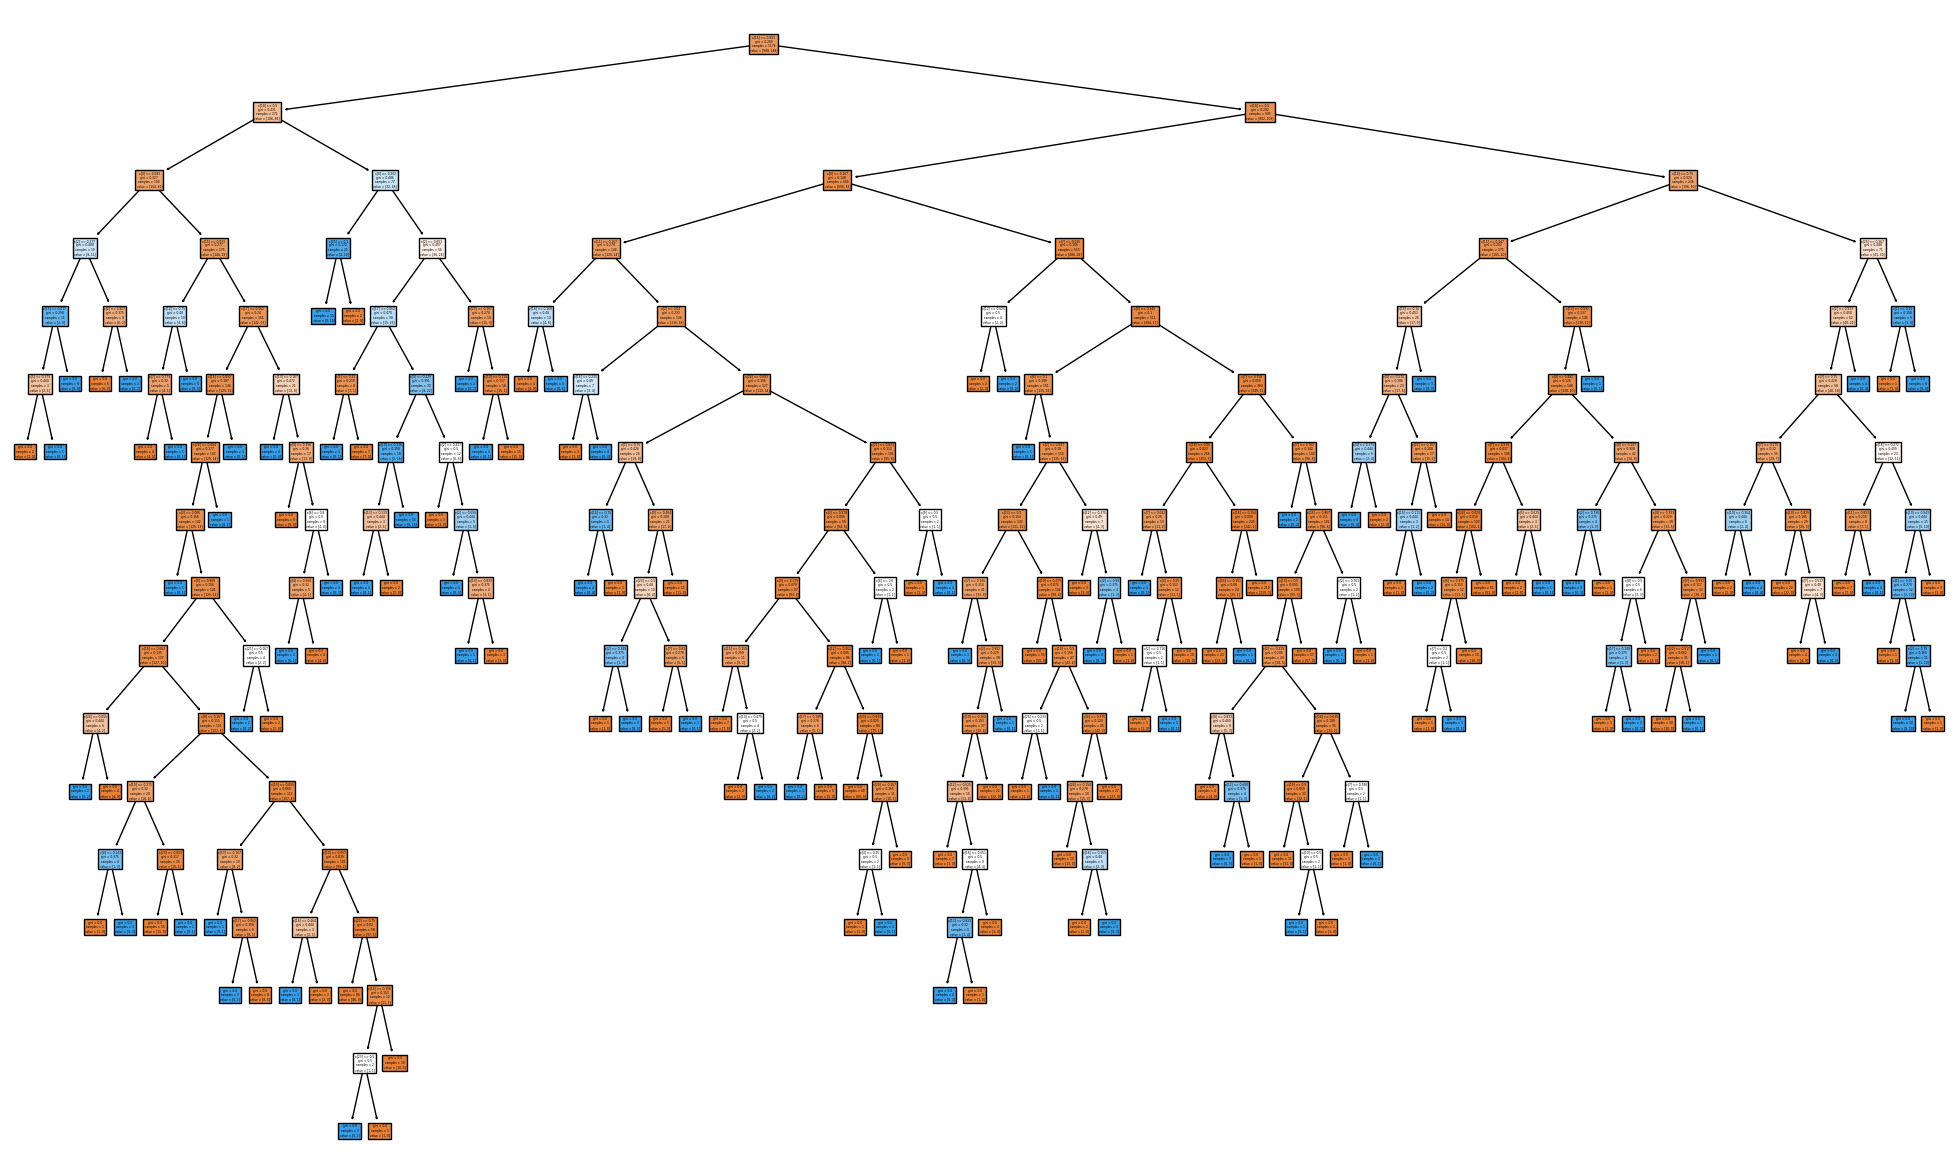

In [187]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [191]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [192]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [193]:
grid_search.fit(x_train,y_train)

/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Use

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [194]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [195]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [196]:
pred3=dtc_cv.predict(x_test)

In [210]:
p3=accuracy_score(y_test,pred3)
accuracy_score(y_test,pred3)

0.8163265306122449

# Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [199]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [200]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [205]:
rfc_cv.fit(x_train,y_train)

/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jewel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [202]:
pred4=rfc_cv.predict(x_test)

In [209]:
p4=accuracy_score(y_test,pred4)
accuracy_score(y_test,pred4)

0.8571428571428571

In [214]:
#Evaluating the best model with the help of accuracy from each model
print("Logistic Regression: ",p)
print("Decesion Tree: ",p2)
print("Decesion Tree with grid search CV: ",p3)
print("Random Forest: ",p4)

Logistic Regression:  0.8843537414965986
Decesion Tree:  0.7619047619047619
Decesion Tree with grid search CV:  0.8163265306122449
Random Forest:  0.8571428571428571


# From the above we can see that Logistic Regression model has the best accurancy for this dataset followed by random forest